In [ ]:
#import library

import pandas as pd
from datetime import datetime
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split as train
from sklearn.metrics import mean_absolute_error as mae
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot as plot

In [ ]:
#connect to google drive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Lokasi File untuk dibaca
home_file_data = 'gdrive/My Drive/dataset/melb_data.csv'

#Membaca Data ke variable home_data
home_data = pd.read_csv(home_file_data)

#Menunjukkan rangkuman statistik seperti rata-rata, median, dll pada kolom.
home_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [ ]:
#membuang column yang nan
home_data = home_data.dropna(axis=0)

#mencari rata rata dari lotsize

avg_lot_size = round(home_data['Landsize'].mean()) #fungsi round untuk pembulatan
print("Rata - Rata Land Size : ", avg_lot_size)

#berdasarkan hari ini, berapa umur dari rumah yang paling terbaru (tahun sekarang - tahun pembuatan)
sekarang = datetime.now()
tahun = sekarang.year

newest_home_year = round(home_data['YearBuilt'].max())
newest_home_age = tahun-newest_home_year 

print("Umur rumah paling terbaru pada saat ini yaitu : ",newest_home_age, "tahun")


Rata - Rata Land Size :  471
Umur rumah paling terbaru pada saat ini yaitu :  3 tahun


In [21]:
# melihat list column yang ada di dalam dataset 

print("List Column Ada Di Dataset")
print(home_data.columns)

#memilih column Price

Y = home_data.Price

#membuat list dari feature 
feature_names = ['Rooms', 'Bedroom2', 'Landsize', 'Bathroom', 'BuildingArea', 'Longtitude', 'Lattitude', 'YearBuilt']

#mendefinisikan feature_names untuk menjai variabel X yang memegang fitur prediktif
X = home_data[feature_names]

#Menunjukkan rangkuman statistik seperti rata-rata, median, dll pada kolom.
print(X.describe())

#cetak beberapa baris teratas
print("Baris Teratas : \n")
print(X.head())
print("\nBaris Terbawah : \n")
print(X.tail())

List Column Ada Di Dataset
Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')
             Rooms     Bedroom2  ...    Lattitude    YearBuilt
count  6196.000000  6196.000000  ...  6196.000000  6196.000000
mean      2.931407     2.902034  ...   -37.807904  1964.081988
std       0.971079     0.970055  ...     0.075850    38.105673
min       1.000000     0.000000  ...   -38.164920  1196.000000
25%       2.000000     2.000000  ...   -37.855438  1940.000000
50%       3.000000     3.000000  ...   -37.802250  1970.000000
75%       4.000000     3.000000  ...   -37.758200  2000.000000
max       8.000000     9.000000  ...   -37.457090  2018.000000

[8 rows x 8 columns]
Baris Teratas : 

   Rooms  Bedroom2  Landsize  ...  Longtitude  Lattitude  YearBuilt
1 

In [24]:
home_model = DecisionTreeRegressor(random_state=1)

#fit model
home_model.fit(X,Y)

#membuat prediksi

predictions = home_model.predict(X)
print(predictions)

#Berfungsi untuk melihat data sebanyak n pada kolom awal (jika tidak diisi, secara random n=6).
Y.head(6)
X.head()

[1035000. 1465000. 1600000. ...  385000.  560000. 2450000.]


,Rooms,Bedroom2,Landsize,Bathroom,BuildingArea,Longtitude,Lattitude,YearBuilt
1,2,2.0,156.0,1.0,79.0,144.9934,-37.8079,1900.0
2,3,3.0,134.0,2.0,150.0,144.9944,-37.8093,1900.0
4,4,3.0,120.0,1.0,142.0,144.9941,-37.8072,2014.0
6,3,4.0,245.0,2.0,210.0,144.9993,-37.8024,1910.0
7,2,2.0,256.0,1.0,107.0,144.9954,-37.8060,1890.0


In [25]:
#train data

train_X, val_X, train_y, val_y = train(X,Y,random_state=1)

#tentukan modelnya

home_model = DecisionTreeRegressor(random_state=1)

#fit model dengan training data
home_model.fit(train_X,train_y)

#prediksi dengan semua obsvarsi validasi
val_predictions = home_model.predict(val_X)

#mencetak beberapa hasil prediksi teratas

print("Top Few Validation Predictions")
print(val_predictions[:5])

#mencetak beberapa hasil yang sebenarnya
print("Top Few Actual Prices From Validation")
print(val_y[:5])

Top Few Validation Predictions
[ 502000. 1910000.  740000.  920000. 2460000.]
Top Few Actual Prices From Validation
6048     620000.0
9186    2320000.0
3991     750000.0
5829    1120000.0
3616    6500000.0
Name: Price, dtype: float64


In [26]:
#Menghitung MAE pada validasi data
val_mae = mae(val_y, val_predictions)

print("MAE pada validasi data : ", val_mae)



MAE pada validasi data :  249242.97869593286


In [27]:
#membuat fungsi MAE

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    maes = mae(val_y, preds_val)
    return(maes)


Tulis loop yang mencoba nilai berikut untuk max_leaf_nodes dari sekumpulan nilai yang mungkin.

Panggil fungsi get_mae pada setiap nilai max_leaf_nodes. Simpan output dengan cara tertentu yang memungkinkan Anda memilih nilai max_leaf_nodes yang memberikan model paling akurat pada data Anda.

In [28]:
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]

#menggunakan fungsi loop untuk menemukan ukuran pohon ideal dari variabel diatas

list_mae = []
for leaf_nodes in candidate_max_leaf_nodes:
    result = get_mae(leaf_nodes, train_X, val_X, train_y, val_y)
    #print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(leaf_nodes, result))
    list_mae.append(result)

#simpan hasil dari max_leaf_nodes yang paling baik 
# Store the best value of max_leaf_nodes (itu akan menjadi 5, 25, 50, 100, 250 or 500)

print("\nthe best value of max_leaf_nodes :")
best_tree_size = candidate_max_leaf_nodes[list_mae.index(min(list_mae))] 
print(best_tree_size)



the best value of max_leaf_nodes :
250


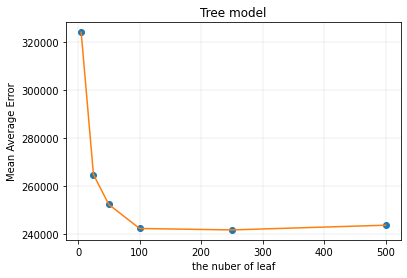

In [29]:
# Variables
a = candidate_max_leaf_nodes
b = list_mae

# Plot
plot(a, b ,'o')
plot(a, b, '-')
plt.xlabel('the nuber of leaf')
plt.ylabel('Mean Average Error')
plt.title('Tree model')
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

In [30]:
#membuat ukuran yang optimal
final_model = DecisionTreeRegressor(max_leaf_nodes = best_tree_size, random_state=1)

#fit final model
final_model.fit(X, Y)
print("Hasil Fit Final Model : ", final_model)


Hasil Fit Final Model :  DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=250,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')
